### Player cards

In [ ]:
after=""
player_query="""query playerQuery($after:String){ 
  player(slug: "rodrigo-javier-de-paul") { 
    id
    displayName
    cards(
      first: 50
      after: $after
    ) {
      pageInfo {
        endCursor
        hasNextPage
      }
      nodes {
        name
        rarity
        blockchain
        blockchainId
        id
        userOwnersWithRate {
          priceInFiat {
            usd
          }
          from
          transferType
        }
      }
    }
  }
}"""

variables = {
  "after":after
}

In [ ]:
next=True
queries=[]
i=0
while next&(i<200):
        player_r=post(url, json={'query': player_query, 'OperationName': 'SignInMutation', 'variables': variables}, 
                headers=headers,cookies=cookies)
        after=player_r.json()['data']['player']['cards']['pageInfo']['endCursor']
        next=player_r.json()['data']['player']['cards']['pageInfo']['hasNextPage']
        variables = {
        "after":after
        }
        queries.append(player_r.json())
        i+=1


KeyError: 'data'

In [ ]:
player_r.text

'{"error":"Retry later"}'

In [ ]:
len(queries)

18

In [ ]:
queries[1]

{'data': {'player': {'id': 'Player:f467d965-b130-47f7-9e8d-6d830821e5df',
   'displayName': 'Rodrigo De Paul',
   'cards': {'pageInfo': {'endCursor': 'WyJlYTljZmZmNy01ZWFjLTRlNDItYTVjOS03NmE1NzhhODViMTkiXQ',
     'hasNextPage': True},
    'nodes': [{'name': 'Rodrigo De Paul 2021-22 • Common',
      'rarity': 'common',
      'blockchain': 'no_blockchain',
      'blockchainId': None,
      'id': 'Card:e93738bf-b999-42c4-9273-b5e828210cec',
      'userOwnersWithRate': [{'priceInFiat': {'usd': 0.0},
        'from': '2021-12-10T10:59:59Z',
        'transferType': 'reward'}]},
     {'name': 'Rodrigo De Paul 2021-22 • Common',
      'rarity': 'common',
      'blockchain': 'starkware',
      'blockchainId': None,
      'id': 'Card:e93ac7e6-2a02-4bc8-acc2-315fc38cb5c9',
      'userOwnersWithRate': [{'priceInFiat': {'usd': 0.0},
        'from': '2021-09-28T09:59:59Z',
        'transferType': 'reward'}]},
     {'name': 'Rodrigo De Paul 2021-22 • Common',
      'rarity': 'common',
      'blockchai

In [ ]:
df=pd.DataFrame()
for i in queries:
    df_cards=pd.json_normalize(i,record_path=['data','player','cards','nodes'])
    df=df.append(df_cards)


<AxesSubplot:xlabel='rarity', ylabel='priceInFiat.usd'>

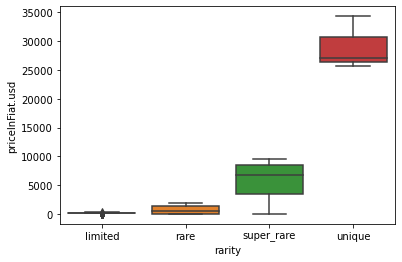

In [ ]:
card_detail=df[df.rarity!='common'].explode(column='userOwnersWithRate').reset_index(drop=True)
price_detail=pd.json_normalize(card_detail['userOwnersWithRate'])
card_detail=card_detail.join(price_detail)
sns.boxplot(data=card_detail,x='rarity',y='priceInFiat.usd')

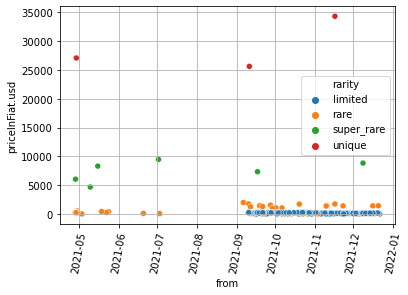

In [ ]:
card_detail['from']=pd.to_datetime(card_detail['from'])
sns.scatterplot(data=card_detail,x='from',y='priceInFiat.usd',hue='rarity')
plt.grid()
plt.xticks(rotation=80);